# Figure-level vs. axes-level functions

In addition to the different modules, there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:

In [ ]:
"Axes Level"또는 "Figure Level"으로도 교차 분류함.
위 예시는 "Axes Level"의 함수
함수의 반환 값인 단일 개체에 데이터를 플로팅합니다.matplotlib.pyplot.Axes

"Figure Level" 함수는 그림을 관리하는 Seaborn 객체(일반적으로 FacetGrid)를 통해 matplotlib와 인터페이스 
다양한 "Axes Level"에 대한 단일 인터페이스를 제공하는 단일 "Figure Level" 함수가 있습니다. 
조직은 다음과 같습니다.

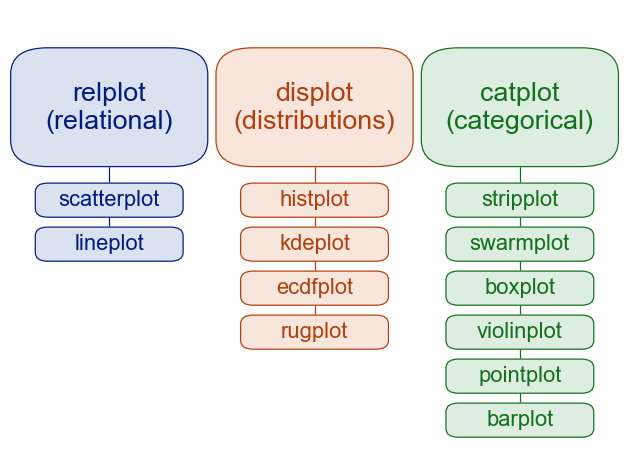

In [ ]:
'Displot()' 은 분포 모듈에 대한 "Figure Level" 함수 입니다. 
기본적으로 histplot()과 동일한 코드를 사용하여 히스토그램을 그리는 것입니다.

C:\Users\black\anaconda3\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


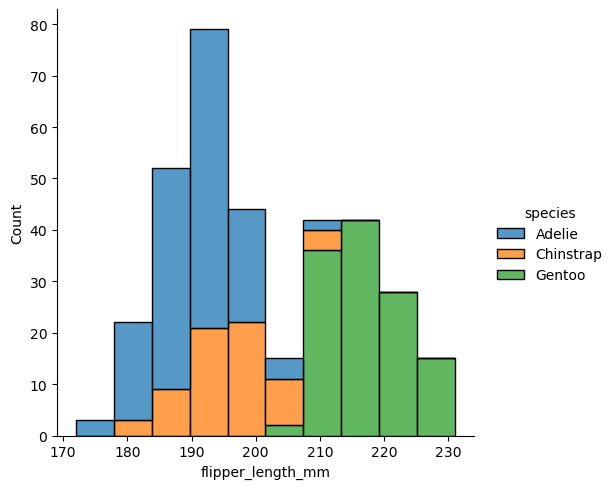

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

In [ ]:
'Kdeplot()'과 동일한 코드를 사용하여 커널 밀도 플롯을 그리려면 
kind = 'kde' 파라미터 지정

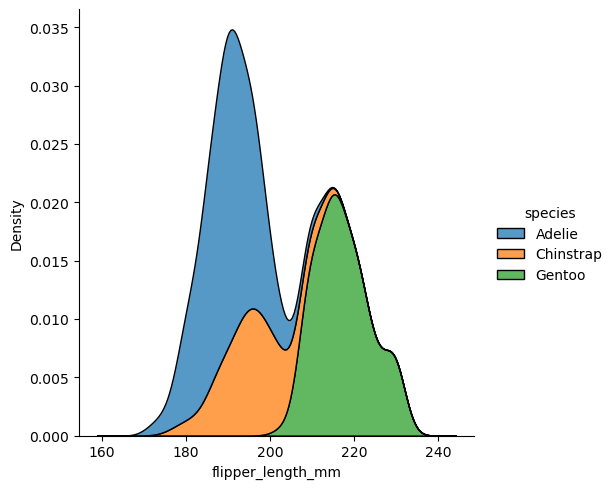

In [14]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")
plt.show()

You’ll notice that the figure-level plots look mostly like their axes-level counterparts, but there are a few differences. Notably, the legend is placed outside the plot. They also have a slightly different shape (more on that shortly).

The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots. For example, instead of stacking the three distributions for each species of penguins in the same axes, we can “facet” them by plotting each distribution across the columns of the figure:

In [15]:
'Figure-level' 플롯은 'Axes-level'플롯과 유사하지만 몇가지 차이점이있다.
바로 보이듯이, 범례가 플롯 밖에 있음. 그리고 조금씩 다른 모습을 보임

가장 큰 특징은 'Figure-level' 함수는 여러 서브플롯들의 그림을 쉽게 만들 수 있다.
예를 들어, 펭귄들의 세가지 종류의 분포를 같은축에 쌓는것보다 
그림의 열에 걸쳐 각 분포를 플롯팅하여 'Facet' 할 수있음 

SyntaxError: invalid syntax (4116867476.py, line 1)

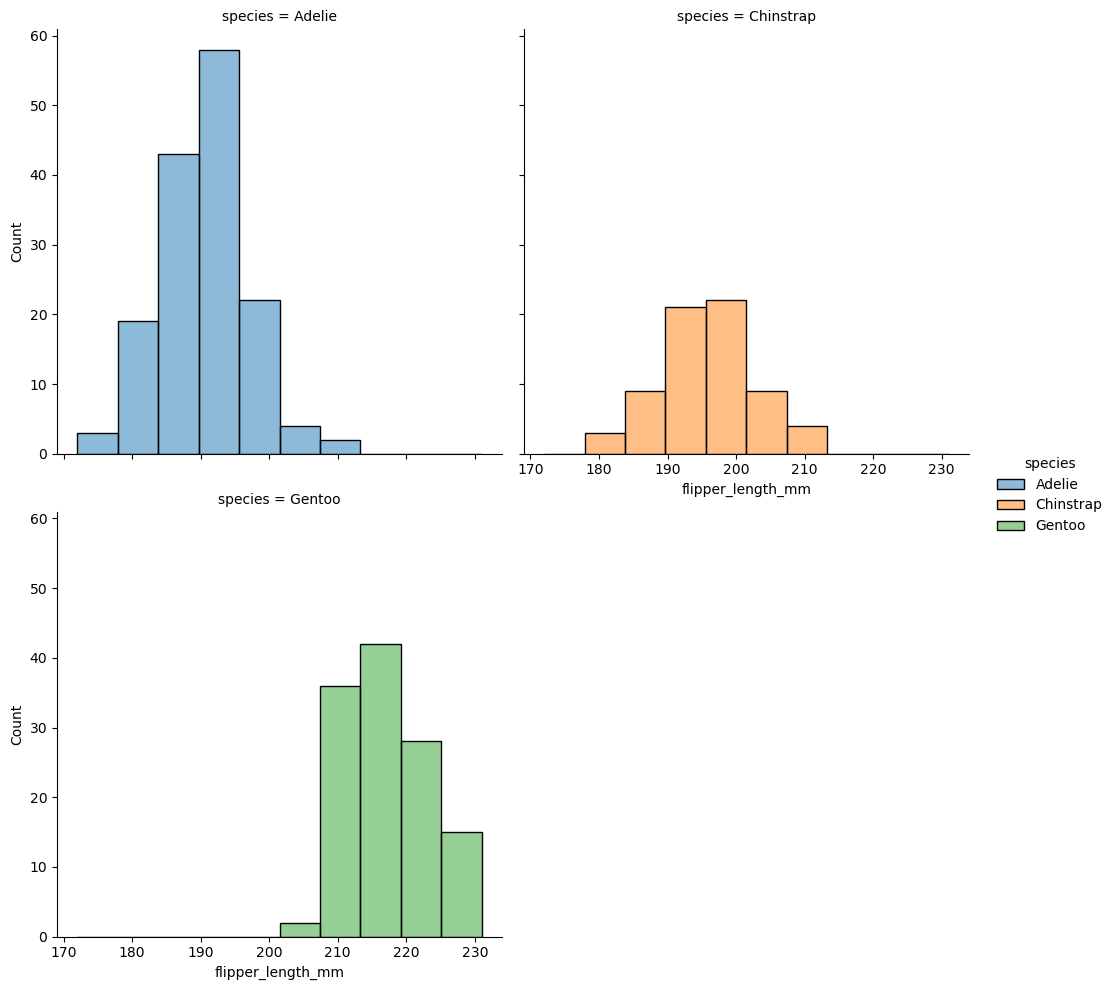

In [18]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species", col_wrap=2)
plt.show()

The figure-level functions wrap their axes-level counterparts and pass the kind-specific keyword arguments (such as the bin size for a histogram) down to the underlying function. That means they are no less flexible, but there is a downside: the kind-specific parameters don’t appear in the function signature or docstrings. Some of their features might be less discoverable, and you may need to look at two different pages of the documentation before understanding how to achieve a specific goal.

In [ ]:
'Figure-level' 함수는 'Axes-level' 함수를 래핑하고 종류별 키워드 인수(예: 히스토그램의 bin 크기)를 
기본 함수로 전달

즉, 유연성이 떨어지지는 않지만 종류가 지정된 매개 변수는 독스트링에 나타나지 않는 단점이 있음
따라서, 일부 기능은 검색하기 어려울 수 있으며 설명서를 살펴봐야 할 수도 있다.

# Axes-level functions make self-contained plots

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:ax=

In [ ]:
Drop-in replacement
#  컴퓨터 공학 등에서 사용되는 용어로 어떤 부품이나 프로그램을 대체 했을 때 
# 다른 설정 등을 바꿀 필요가 없고 
# 성능 저하도 없으며 오히려 속도, 안정성, 용량 등의 성능이 올라가는 대체를 의미

'Axes-level' 함수는  matplotlib 함수에 대한 Drop-in replacement처럼 작동하도록 작성
# 같은 기능하지만 전체적인 퀄리티는 올라간다는 내용인듯 => 상위호환느낌?
축 레이블과 범례를 자동으로 추가하지만 그려진 축 이외의 항목은 수정하지 않음
즉, 예측 가능한 결과를 가진 임의로 복잡한 matplotlib 수치로 구성 

'Axes-level' 함수는 내부적으로 matplotlib.pyplot.gca()를 호출하며, 
이 함수는 matplotlib 상태-기계 인터페이스에 연결하여 "현재 활성" 축에 플롯을 그립니다. 
객체지향 인터페이스와 통합되며 플롯이 정확하게 어디에 쓰이는지에 대한 인수를 추가로 지정해줘야한다

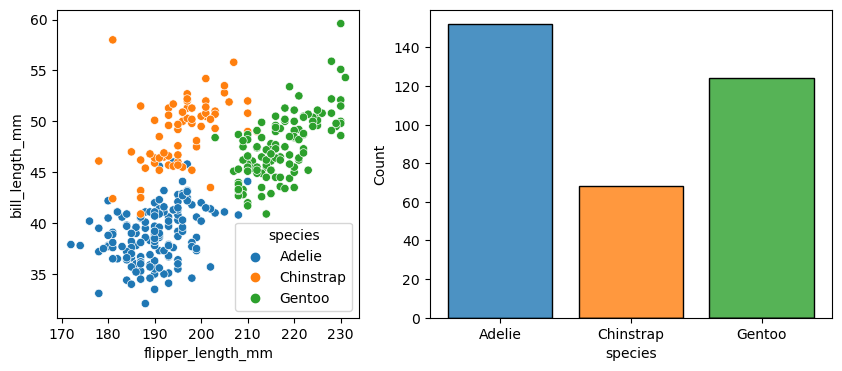

In [37]:
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[3, 4]))
# Dict with keywords passed to the `~matplotlib.gridspec.GridSpec`
#    constructor used to create the grid the subplots are placed on.
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
plt.show()

# Figure-level functions own their figure

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

In [ ]:
'Figure-level' 함수는 'Axes-level' 함수와는 대조적으로 (상대적으로) 그렇게 쉽게 다른 플롯을 만들 수 없다.
자체의 Figure를 "소유"하므로 'Figure-level' 함수를 사용하여 기존 축에 플롯을 그릴 개념이 없습니다
이 조건을 사용하면 'Figure-level' 함수가 범례를 플롯 외부에 배치하는 것과 같은 기능을 구현할 수 있음
'Figure-level' 함수가 반환하는 객체의 matplotlib 축에 액세스하고(무슨말...?해석해봐도 모르겠다)
다른 요소를 플롯에 추가하면 제공되는 것 이상의 기능을 끌어낼 수 있다.

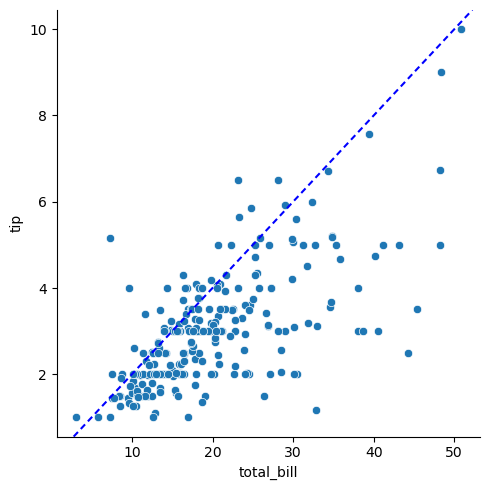

In [43]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=0.2, color="b", dashes=(3, 2))
plt.show()

axline : 기울기 보조선

# Customizing plots from a figure-level function

The figure-level functions return a FacetGrid instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code:

While convenient, this does add a bit of extra complexity, as you need to remember that this method is not part of the matplotlib API and exists only when using a figure-level function.

In [ ]:
'Figure-level' 함수는 서브플롯 구성에 대해 "스마트한" 방식으로 플롯의 속성 지정하는
몇 가지 메서드가 있다
예를 들어, 한 줄의 코드를 사용하여 외부 좌표축의 레이블을 변경할 수 있습니다.

편리하기는 하지만 이 메서드는 matplotlib API의 기능이 아니며
'Figure-level' 함수를 사용할 때만 쓸 수 있어서 약간 복잡함.

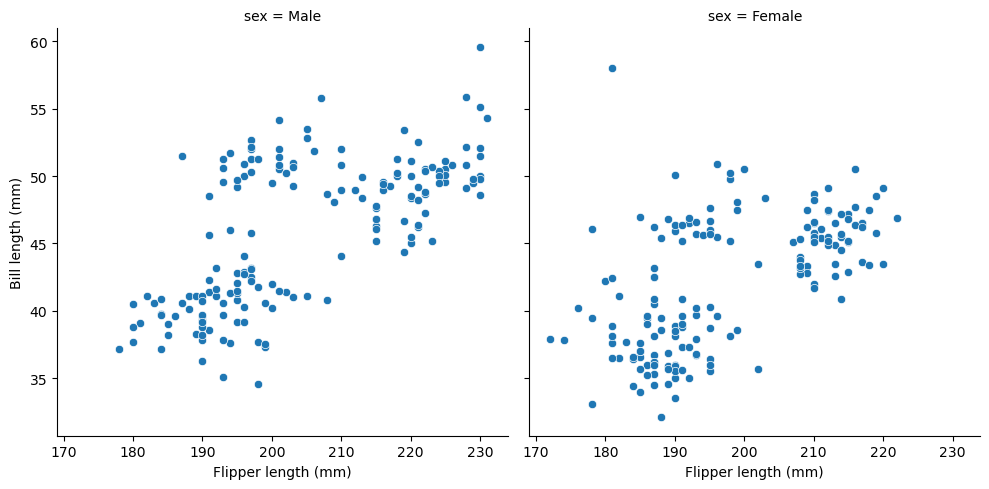

In [46]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")
plt.show()